In [9]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [10]:

DATASET_DIR="/home/nada/img_processing/exam/dataset/trainingSet"

TRAIN_FEATURES=[]
TRAIN_LABELS=[]
TEST_FEATURES=[]
TEST_LABELS=[]


In [11]:
clasess_dir = os.listdir(DATASET_DIR)
for class_name in clasess_dir:
    image_names = os.listdir(DATASET_DIR+"/"+class_name)
    for img_name in image_names:
        img = cv2.imread(DATASET_DIR+"/"+class_name+"/"+img_name, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (100,100), cv2.INTER_AREA)
        feature = np.reshape(img, (img.shape[0]*img.shape[1]))
        TRAIN_FEATURES.append(feature)
        TRAIN_LABELS.append(class_name)


In [12]:
# split dataset into 50% training and 50% testing 
TRAIN_FEATURES, TEST_FEATURES, TRAIN_LABELS, TEST_LABELS = \
    train_test_split(TRAIN_FEATURES, TRAIN_LABELS, train_size=0.5, test_size=0.5)


In [13]:
rfc_model = RandomForestClassifier()
rfc_model.fit(TRAIN_FEATURES, TRAIN_LABELS)

RandomForestClassifier()

In [14]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(TRAIN_FEATURES, TRAIN_LABELS)

KNeighborsClassifier(n_neighbors=3)

In [19]:
rfc_predicted_labels = rfc_model.predict(TEST_FEATURES)
knn_predicted_labels = knn_model.predict(TEST_FEATURES)

rfc_accuracy = accuracy_score(TEST_LABELS, rfc_predicted_labels)*100
knn_accuracy = accuracy_score(TEST_LABELS, knn_predicted_labels)*100

print("random forest classifier accuracy = " + str(rfc_accuracy))
print("KNN accuracy = " + str(knn_accuracy))

random forest classifier accuracy = 95.74285714285715
KNN accuracy = 96.66190476190476


<BarContainer object of 2 artists>

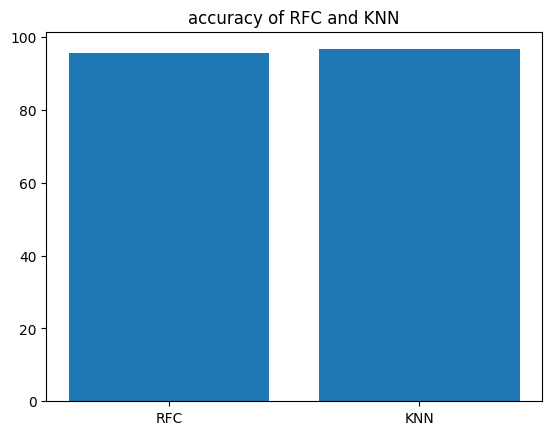

In [20]:
fig, (ax) = plt.subplots(1, 1)
ax.title.set_text('accuracy of RFC and KNN')
ax.bar(['RFC', 'KNN'],[rfc_accuracy, knn_accuracy], align='center')
